In [134]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import plotly.express as px

In [135]:
df = pd.read_csv("telemetry_data_4_12_2024_2.csv")
print(df.columns)

Index(['TrackName', 'TrackType', 'SessionFlag', 'CarName', 'RacePosition',
       'Lap Nbr', 'PaceMode', 'OnPitRoad', 'LpDistance', 'LapDistPrct %',
       'SessionTime', 'IsOnTrack', 'PreviousLap', 'LapBestLap', 'LapCompleted',
       'CurrentLapTime', 'LapBestLapTime', 'LapDeltaToBestLap',
       'LapDeltaToBestLap_DD', 'Throttle %', 'Brake %', 'Clutch %',
       'Speed (MPH)', 'currentGear', 'GearDisplay', 'RPM',
       'SteeringWheelAngle (deg)', 'FuelLevelPct', 'LFtempCL (F)',
       'LFtempCR (F)', 'LFtempCM (F)', 'LRtempCL (F)', 'LRtempCR (F)',
       'LRtempCM (F)', 'RFtempCL (F)', 'RFtempCR (F)', 'RFtempCM (F)',
       'RRtempCL (F)', 'RRtempCR (F)', 'RRtempCM (F)', 'LFwearL %',
       'LFwearM %', 'LFwearR %', 'LRwearL %', 'LRwearM %', 'LRwearR %',
       'RFwearL %', 'RFwearM %', 'RFwearR %', 'RRwearL %', 'RRwearM %',
       'RRwearR %', 'TrackTemp (F)', 'OilTemp (F)', 'WaterTemp (F)',
       'AirDensity (lbs/ft^3)', 'AirPressure (bar)', 'AirTemp (F)',
       'WindDir (deg)'

C:\Users\Marissa Petty\AppData\Local\Temp\ipykernel_272\394848839.py:1: DtypeWarning:

Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.



In [136]:
track_location_columns=['TrackName','Lap Nbr','LpDistance','SessionTime','CurrentLapTime','Speed (MPH)','PreviousLap','LapCompleted','SteeringWheelAngle (deg)','Speed (MPH)','currentGear']

In [137]:
track_location_df = df[track_location_columns]
display(track_location_df)

,TrackName,Lap Nbr,LpDistance,SessionTime,CurrentLapTime,Speed (MPH),PreviousLap,LapCompleted,SteeringWheelAngle (deg),Speed (MPH),currentGear
0,Martinsville Speedway,0,760.685652,08:48.000266,00:00.000000,0.01,0.000,0,3.053,0.01,0
1,Martinsville Speedway,0,760.685652,08:48.000366,00:00.000000,0.01,0.000,0,3.070,0.01,0
2,Martinsville Speedway,0,760.685652,08:48.000450,00:00.000000,0.01,0.000,0,2.891,0.01,0
3,Martinsville Speedway,0,760.685652,08:48.000550,00:00.000000,0.01,0.000,0,2.679,0.01,0
4,Martinsville Speedway,0,760.685652,08:48.000650,00:00.000000,0.00,0.000,0,2.623,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...
8198,Martinsville Speedway,36,758.060870,22:50.000316,00:24.000590,0.00,32.983,35,-42.822,0.00,1
8199,Martinsville Speedway,36,758.060920,22:50.000433,00:24.000707,0.00,32.983,35,-42.868,0.00,1
8200,Martinsville Speedway,36,758.060920,22:50.000533,00:24.000807,0.00,32.983,35,-42.928,0.00,1
8201,Martinsville Speedway,36,758.060920,22:50.000633,00:24.000907,0.00,32.983,35,-42.822,0.00,1


In [140]:
#start finish
start_time = track_location_df['PreviousLap'].min()
finish_time = track_location_df['PreviousLap'].max()
print(start_time)
print(finish_time)

0.0
65.826


In [119]:
#length of the track 
length_track='.526'

In [122]:
track_location_df

,TrackName,Lap Nbr,LpDistance,SessionTime,CurrentLapTime,Speed (MPH),PreviousLap,LapCompleted,SteeringWheelAngle (deg),Speed (MPH),currentGear
0,Martinsville Speedway,0,760.685652,08:48.000266,00:00.000000,0.01,0.000,0,3.053,0.01,0
1,Martinsville Speedway,0,760.685652,08:48.000366,00:00.000000,0.01,0.000,0,3.070,0.01,0
2,Martinsville Speedway,0,760.685652,08:48.000450,00:00.000000,0.01,0.000,0,2.891,0.01,0
3,Martinsville Speedway,0,760.685652,08:48.000550,00:00.000000,0.01,0.000,0,2.679,0.01,0
4,Martinsville Speedway,0,760.685652,08:48.000650,00:00.000000,0.00,0.000,0,2.623,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...
8198,Martinsville Speedway,36,758.060870,22:50.000316,00:24.000590,0.00,32.983,35,-42.822,0.00,1
8199,Martinsville Speedway,36,758.060920,22:50.000433,00:24.000707,0.00,32.983,35,-42.868,0.00,1
8200,Martinsville Speedway,36,758.060920,22:50.000533,00:24.000807,0.00,32.983,35,-42.928,0.00,1
8201,Martinsville Speedway,36,758.060920,22:50.000633,00:24.000907,0.00,32.983,35,-42.822,0.00,1


In [143]:
# Group by 'lap_number' and get the maximum 'lap_time' for each group
max_lap_times_per_lap = track_location_df.groupby('Lap Nbr')['CurrentLapTime'].max().reset_index()


In [125]:
# Create a Plotly bar chart
fig = px.line(max_lap_times_per_lap, x='Lap Nbr', y=['CurrentLapTime'],
             title='Maximum Lap Time per Lap Number',
             labels={'Lap Nbr': 'Lap Number', 'CurrentLapTime_2': 'Max Lap Time'})

# Show the Plotly chart
fig.show()

In [144]:

filtered_df = track_location_df[track_location_df['Lap Nbr'] == 1]

fig = px.line(filtered_df, x='CurrentLapTime', y='SteeringWheelAngle (deg)', color='Lap Nbr',
              title='All Current Lap Times',
              labels={'CurrentLapTime': 'Lap Time', 'SteeringWheelAngle (deg)': 'Steering Wheel Angle'})


# Show the plot
fig.show()

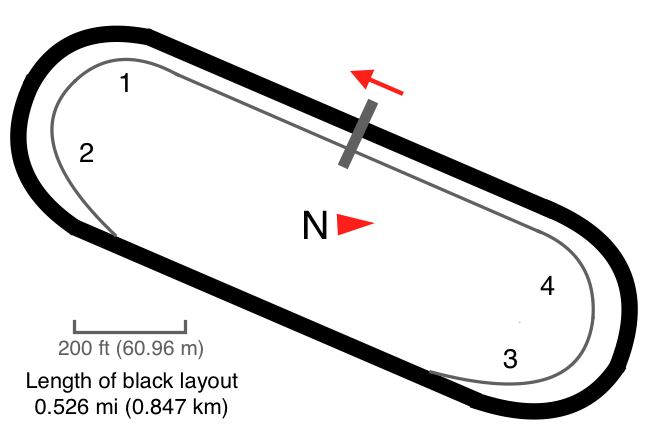

In [145]:
# Load the background image
bg_image = Image.open("track_photos\Martinsville_Speedway_track_map.png")
(bg_image)

In [ ]:
## creating a flag to find a turn vs a straight 

In [147]:
 # Example threshold value
df['Track Location'] = df['SteeringWheelAngle (deg)'].apply(lambda value: 'turn' if value < -5 else 'straight')

display(df)

,TrackName,TrackType,SessionFlag,CarName,RacePosition,Lap Nbr,PaceMode,OnPitRoad,LpDistance,LapDistPrct %,...,LongAccel (m/s),VertAccel (m/s),Roll (deg),RollRate (deg/s),Yaw (deg),YawRate (deg/s),Pitch (deg),PitchRate (deg/s),gForces,Track Location
0,Martinsville Speedway,NaN,"('Practice',)",NASCAR Chevrolet Camaro ZL1,0,0,Not Pacing,True,760.685652,29.5,...,0.007369,0.998901,2.138,0,-133.832,-1,0.421,-1,0.102002,straight
1,Martinsville Speedway,NaN,"('Practice',)",NASCAR Chevrolet Camaro ZL1,0,0,Not Pacing,True,760.685652,29.5,...,0.007409,0.998957,2.138,-1,-133.832,0,0.421,0,0.102008,straight
2,Martinsville Speedway,NaN,"('Practice',)",NASCAR Chevrolet Camaro ZL1,0,0,Not Pacing,True,760.685652,29.5,...,0.007473,0.999009,2.138,0,-133.832,-1,0.421,-1,0.102013,straight
3,Martinsville Speedway,NaN,"('Practice',)",NASCAR Chevrolet Camaro ZL1,0,0,Not Pacing,True,760.685652,29.5,...,0.007409,0.998892,2.138,0,-133.832,-1,0.421,-1,0.102001,straight
4,Martinsville Speedway,NaN,"('Practice',)",NASCAR Chevrolet Camaro ZL1,0,0,Not Pacing,True,760.685652,29.5,...,0.007273,0.998925,2.137,-1,-133.832,0,0.421,-1,0.102005,straight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8198,Martinsville Speedway,NaN,"('Practice',)",NASCAR Chevrolet Camaro ZL1,1,36,Not Pacing,True,758.060870,29.4,...,0.003488,0.985776,-3.329,0,-131.928,-1,0.311,-1,0.100758,turn
8199,Martinsville Speedway,NaN,"('Practice',)",NASCAR Chevrolet Camaro ZL1,1,36,Not Pacing,True,758.060920,29.4,...,0.007146,1.006052,-3.339,-1,-131.930,0,0.293,0,0.102841,turn
8200,Martinsville Speedway,NaN,"('Practice',)",NASCAR Chevrolet Camaro ZL1,1,36,Not Pacing,True,758.060920,29.4,...,0.004832,0.991701,-3.329,-1,-131.932,-1,0.276,-1,0.101377,turn
8201,Martinsville Speedway,NaN,"('Practice',)",NASCAR Chevrolet Camaro ZL1,1,36,Not Pacing,True,758.060920,29.4,...,0.003864,1.000771,-3.334,0,-131.930,-1,0.296,-1,0.102288,turn
